# Day 7 - Part 1

In the bag DAG, how many nodes are ancestors of the gold bag node?

In [2]:
rules_str = """light red bags contain 1 bright white bag, 2 muted yellow bags.
dark orange bags contain 3 bright white bags, 4 muted yellow bags.
bright white bags contain 1 shiny gold bag.
muted yellow bags contain 2 shiny gold bags, 9 faded blue bags.
shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags.
dark olive bags contain 3 faded blue bags, 4 dotted black bags.
vibrant plum bags contain 5 faded blue bags, 6 dotted black bags.
faded blue bags contain no other bags.
dotted black bags contain no other bags."""

In [84]:
rules = [r.strip() for r in rules_str.split('.') if r.strip()]
rules

['light salmon bags contain 5 dotted olive bags, 4 wavy lavender bags',
 'dark purple bags contain 5 striped maroon bags, 1 wavy maroon bag',
 'muted lime bags contain 4 drab lavender bags, 1 clear orange bag, 2 striped black bags',
 'light green bags contain 5 dull gray bags, 3 dark crimson bags',
 'bright violet bags contain 1 bright purple bag',
 'dotted magenta bags contain 2 wavy beige bags, 1 dotted bronze bag',
 'wavy bronze bags contain 4 clear fuchsia bags',
 'bright plum bags contain 2 dim violet bags',
 'shiny yellow bags contain 5 clear violet bags, 3 drab maroon bags',
 'pale tomato bags contain 3 bright aqua bags',
 'light chartreuse bags contain 3 vibrant fuchsia bags',
 'mirrored blue bags contain 2 pale aqua bags',
 'muted maroon bags contain 3 muted indigo bags, 1 vibrant gold bag',
 'clear green bags contain 4 dotted beige bags',
 'muted indigo bags contain 1 dull green bag',
 'faded orange bags contain 1 shiny gold bag, 4 dim tomato bags',
 'posh purple bags contain

In [13]:
def parse_lhs(lhs):
    return ' '.join(lhs.split()[:-1])

def parse_rhs(rhs):
    children = rhs.split(', ')
    coded_rules = []
    for child in children:
        tokens = child.split()
        k, color = tokens[0], ' '.join(tokens[1:-1])
        coded_rules.append({'k':k,'color':color})
    return coded_rules

def parse_rule(rule_str):
    lhs, rhs = rule.split('contain')
    parent_color = parse_lhs(lhs)
    coded_rules = parse_rhs(rhs)
    return parent_color, coded_rules
    
for rule in rules:
    print(rule)
    print(parse_rule(rule))
    print()

light red bags contain 1 bright white bag, 2 muted yellow bags
('light red', [{'k': '1', 'color': 'bright white'}, {'k': '2', 'color': 'muted yellow'}])

dark orange bags contain 3 bright white bags, 4 muted yellow bags
('dark orange', [{'k': '3', 'color': 'bright white'}, {'k': '4', 'color': 'muted yellow'}])

bright white bags contain 1 shiny gold bag
('bright white', [{'k': '1', 'color': 'shiny gold'}])

muted yellow bags contain 2 shiny gold bags, 9 faded blue bags
('muted yellow', [{'k': '2', 'color': 'shiny gold'}, {'k': '9', 'color': 'faded blue'}])

shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags
('shiny gold', [{'k': '1', 'color': 'dark olive'}, {'k': '2', 'color': 'vibrant plum'}])

dark olive bags contain 3 faded blue bags, 4 dotted black bags
('dark olive', [{'k': '3', 'color': 'faded blue'}, {'k': '4', 'color': 'dotted black'}])

vibrant plum bags contain 5 faded blue bags, 6 dotted black bags
('vibrant plum', [{'k': '5', 'color': 'faded blue'}, {'k': '6', 'c

In [14]:
import networkx as nx
from collections import defaultdict

In [85]:
# How many bag colors can eventually contain at least one shiny gold bag?
# >>  At least for part one, don't need to register all combinatorics, just the color relationships

class BagGraphByColors:
    def __init__(self):
        self.g = nx.DiGraph()
        #self.bags_by_color = defaultdict(list)
    def register_rule(self, rule):
        parent, children = rule
        for child in children:
            k=child['k']
            if k == 'no':
                k=0
            self.g.add_edge(parent, child['color'], k=k)
        
bg = BagGraphByColors()
for rule in rules:
    #print('##',rule)
    bg.register_rule( parse_rule(rule) )

In [86]:
import matplotlib.pyplot as plt

layout = nx.spring_layout(bg.g)
nx.draw(bg.g, pos = layout, alpha = .3)
nx.draw_networkx_labels(bg.g, pos=layout)
plt.show()

KeyboardInterrupt: 

In [29]:
from networkx.algorithms.dag import ancestors

queue = ancestors(bg.g, 'shiny gold')
#visited = []

#while queue
#    parent = 
queue

{'bright white', 'dark orange', 'light red', 'muted yellow'}

In [87]:
with open('input.txt','r') as f:
    rules_str = f.read()

rules = [r.strip() for r in rules_str.split('.') if r]

bg = BagGraphByColors()
for rule in rules:
    if rule:
        bg.register_rule( parse_rule(rule) )

In [88]:
len(ancestors(bg.g, 'shiny gold'))

261

# Part 2

use DFS to build a generator that traverses all the terminal paths originating at my bag.
Take the product of edge weights along each path, then sum the per-terminal-path products for the solution

... for efficiency, I can actually just write the cumulative product as a ~~node~~ (edge? edge.) edge attribute. in the event that we have multiple edges converging at a single downstream node (which we likely will), we take the products *along the edges*, then sum the respective products for the incoming weight of the node, and propagate this to the child edges.

with the above propagation component in mind, it might actually make more sense to use BFS here rather than DFS, since any collisions with already-visited nodes will require updating all downstream nodes again. Which would exponentially explode our permutations. Definitely BFS here.

In [89]:
bag  = 'shiny gold'
nodes = descendants(bg.g, bag)
nodes.add(bag)

mybagsubtree = bg.g.subgraph(nodes)

In [90]:
nx.set_node_attributes(mybagsubtree, 0, name='acc')

In [91]:
leaves = list(mybagsubtree.predecessors('other'))
leaves

['plaid fuchsia',
 'light teal',
 'dim violet',
 'dark brown',
 'light aqua',
 'drab black',
 'shiny violet',
 'dim chartreuse']

In [95]:
from networkx.algorithms.shortest_paths.weighted import dijkstra_path, dijkstra_path_length

In [124]:
total = 0
for leaf in leaves:
    path = dijkstra_path(G=mybagsubtree, 
                         source=bag, 
                         target=leaf,
                         weight=lambda v,u,e: int(e['k'])
                        )
    path_len = dijkstra_path_length(G=mybagsubtree, 
                                    source=bag, 
                                    target=leaf,
                                    weight=lambda v,u,e: int(e['k'])
                        )
    print(path_len, leaf)
    print(path)
    
    acc = 0
    for i,p in enumerate(path):
        if i < (len(path)-1):
            q = path[i+1]
            k = int(mybagsubtree[p][q]['k'])
            #if k == 1:
            #    acc +=1
            #else:
            #    acc *= k
            #if acc ==0:
            #    acc = k
            #else:
            #    acc += acc**k
            #acc = acc*k + k
            acc += acc*k + k
            print(p, q, k, acc)
        
    total += acc
    
    print(total)
    print()
    # 7 is not correct answer! (min weighted path length)
    # 1457461856 is not correct answer! (accumulated acc_weights**edge_weight (acc:=1;acc+=acc*k), summed over leaves accumulated)
    # 343 is too low! (acc:=0; acc=acc*k+k)
    # 1204 isn't correct! (acc:=0; acc+=acc*k+k) ... now I'm just hunting and pecking

7 plaid fuchsia
['shiny gold', 'wavy chartreuse', 'bright crimson', 'plaid fuchsia']
shiny gold wavy chartreuse 5 5
wavy chartreuse bright crimson 1 11
bright crimson plaid fuchsia 1 23
23

9 light teal
['shiny gold', 'wavy chartreuse', 'pale gray', 'dull green', 'light teal']
shiny gold wavy chartreuse 5 5
wavy chartreuse pale gray 1 11
pale gray dull green 1 23
dull green light teal 2 71
94

14 dim violet
['shiny gold', 'wavy chartreuse', 'shiny silver', 'light gold', 'dim violet']
shiny gold wavy chartreuse 5 5
wavy chartreuse shiny silver 1 11
shiny silver light gold 3 47
light gold dim violet 5 287
381

11 dark brown
['shiny gold', 'wavy chartreuse', 'pale gray', 'dark turquoise', 'dark brown']
shiny gold wavy chartreuse 5 5
wavy chartreuse pale gray 1 11
pale gray dark turquoise 2 35
dark turquoise dark brown 3 143
524

9 light aqua
['shiny gold', 'wavy chartreuse', 'pale gray', 'dotted orange', 'light aqua']
shiny gold wavy chartreuse 5 5
wavy chartreuse pale gray 1 11
pale gray

In [ ]:
# Ok, I think what I actually need to do here is to work backwards from the leaves, summing into the accumulators

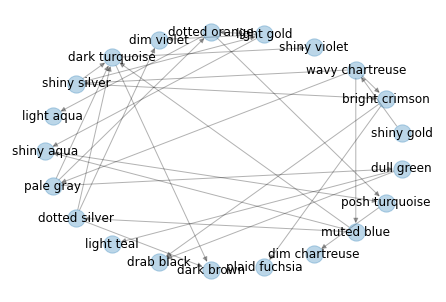

In [104]:
g2 = nx.DiGraph(mybagsubtree)
g2.remove_node('other')
#layout = nx.planar_layout(g2) # not planar!
layout = nx.shell_layout(g2) # not planar!
#layout = nx.spring_layout(g2)
nx.draw(g2, pos = layout, alpha = .3)
nx.draw_networkx_labels(g2, pos=layout)
plt.show()

# Let's color it by steps from root (unweighted, i.e. BFS depth)



In [ ]:
# Ok... maybe I'm getting too fancy here. I think the "work back from the leaves" Idea was correct, but it might be sort of
# a pain in the ass to accomplish...
# I think I just need to put the accumulator on the edges again, and only accumulate nodes where we have the weights....

# yeah, fuck this. This is still too complicated. 
# I think the easiest approach here will be to just literally construct my "bag" as a tree according to the rules
# encoded in the graph, and count how many bags are in it is I go.
# ... which is ultimately going to be equivalent to taking the cumulative edge product along each outgoing path

# Old Code

In [ ]:
class BagGraphTraversable(BagGraphByColors):
    def traverse(self, color):
        queue = self.g[color]
        next_layer = []
        acc = 0
        src = color
        while queue:
            tgt = queue.pop()
            acc += bg.g.edges(data=True)[]['k']

In [ ]:
# It was sort of accidental, but I actually have "is terminal node" as a node itself: "other". 
# If I look at the immediate parents of this node, I'll have all of the leaves of this tree.
# I can then query the graph for the shortest path to each respective leaf (accounting for edge weight), 
# and calculate the shortest path to any leaf as my solution

In [53]:
bg.g.edges.data('k')#['shiny gold']

OutEdgeDataView([('light salmon', 'dotted olive', '5'), ('light salmon', 'wavy lavender', '4'), ('dotted olive', 'dark brown', '5'), ('wavy lavender', 'dull lime', '1'), ('dark purple', 'striped maroon', '5'), ('dark purple', 'wavy maroon', '1'), ('striped maroon', 'shiny white', '5'), ('wavy maroon', 'mirrored fuchsia', '5'), ('wavy maroon', 'dim olive', '5'), ('muted lime', 'drab lavender', '4'), ('muted lime', 'clear orange', '1'), ('muted lime', 'striped black', '2'), ('drab lavender', 'striped tomato', '3'), ('drab lavender', 'bright brown', '1'), ('clear orange', 'bright cyan', '3'), ('clear orange', 'dull lavender', '1'), ('striped black', 'vibrant purple', '2'), ('striped black', 'vibrant salmon', '4'), ('striped black', 'clear gold', '2'), ('striped black', 'shiny yellow', '3'), ('light green', 'dull gray', '5'), ('light green', 'dark crimson', '3'), ('dull gray', 'posh orange', '4'), ('dull gray', 'shiny gold', '3'), ('dull gray', 'dim tomato', '1'), ('dull gray', 'bright cri

In [56]:
# lol, fuck that.
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.dag_to_branching.html

from networkx.algorithms.dag import dag_to_branching, descendants
paths = dag_to_branching(mybagsubtree)

In [68]:
len(paths), len(nodes)

(68, 22)

In [67]:
#len(paths)
paths.nodes(data=True)
#paths.nodes(data=True)['eb520c12-39ee-11eb-bd64-60f262a82202'] # {'source': 'shiny gold'}

NodeDataView({'eb520c12-39ee-11eb-bd64-60f262a82202': {'source': 'shiny gold'}, 'eb520c13-39ee-11eb-8597-60f262a82202': {'source': 'wavy chartreuse'}, 'eb520c14-39ee-11eb-be29-60f262a82202': {'source': 'muted blue'}, 'eb520c15-39ee-11eb-9c0f-60f262a82202': {'source': 'shiny aqua'}, 'eb520c16-39ee-11eb-b462-60f262a82202': {'source': 'posh turquoise'}, 'eb520c17-39ee-11eb-8f83-60f262a82202': {'source': 'dim chartreuse'}, 'eb520c18-39ee-11eb-bab5-60f262a82202': {'source': 'other'}, 'eb520c19-39ee-11eb-a033-60f262a82202': {'source': 'dark turquoise'}, 'eb520c1a-39ee-11eb-ac49-60f262a82202': {'source': 'shiny violet'}, 'eb520c1b-39ee-11eb-8e07-60f262a82202': {'source': 'other'}, 'eb520c1c-39ee-11eb-b8ef-60f262a82202': {'source': 'dark brown'}, 'eb520c1d-39ee-11eb-a88f-60f262a82202': {'source': 'other'}, 'eb520c1e-39ee-11eb-b543-60f262a82202': {'source': 'dotted silver'}, 'eb520c1f-39ee-11eb-99e1-60f262a82202': {'source': 'dark brown'}, 'eb520c20-39ee-11eb-87e3-60f262a82202': {'source': 'oth

In [ ]:

        
        
    def _add_node(self, color, k=1):
        assert color not in self.g
        bags_collection = self.bags_by_color[color]
        self.g.add_node(color, k=k)
    def update_color(self, color, k=1):
        if color not in self.g:
            self._add_node(color, k=k)
        else:
            self.g.nodes(data=True)['color']['k'] += k
